In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from math import sqrt

In [61]:
df= pd.read_csv("C:/Users/Administrator/Downloads/historic_demand_2009_2024_noNaN.csv")
df

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278507,2024-12-05 21:30:00,44,21:30:00,29114,31431,27212,5377,6622,0,17194,0,736,558,758,1003,-450,-531,999,0
278508,2024-12-05 22:00:00,45,22:00:00,27204,29846,25477,5486,6622,0,17194,0,868,-193,263,1002,-450,-531,949,0
278509,2024-12-05 22:30:00,46,22:30:00,26006,28805,24428,5594,6622,0,17194,0,944,-274,211,997,-450,-531,943,0
278510,2024-12-05 23:00:00,47,23:00:00,23908,26825,22590,5575,6622,0,17194,0,864,-404,-77,280,-450,-522,338,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278512 entries, 0 to 278511
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            278512 non-null  object
 1   settlement_period          278512 non-null  int64 
 2   period_hour                278512 non-null  object
 3   nd                         278512 non-null  int64 
 4   tsd                        278512 non-null  int64 
 5   england_wales_demand       278512 non-null  int64 
 6   embedded_wind_generation   278512 non-null  int64 
 7   embedded_wind_capacity     278512 non-null  int64 
 8   embedded_solar_generation  278512 non-null  int64 
 9   embedded_solar_capacity    278512 non-null  int64 
 10  non_bm_stor                278512 non-null  int64 
 11  pump_storage_pumping       278512 non-null  int64 
 12  ifa_flow                   278512 non-null  int64 
 13  ifa2_flow                  278512 non-null  

In [65]:
df.describe()

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
count,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000,278512.000000
mean,24.497357,31187.041370,32685.811143,28389.589217,1272.085027,4453.970263,880.245314,8705.061549,6.668416,304.497031,926.247609,53.998768,504.137998,-125.145276,-51.106742,176.336876,0.022405
std,13.852025,7831.306542,7598.781279,7091.113104,966.548452,1955.825654,1710.954426,5869.536138,39.197650,528.163447,1068.846762,354.179475,541.678428,230.383910,263.267266,422.130995,0.147996
min,1.000000,13367.000000,16513.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1023.000000,0.000000
25%,12.000000,24907.750000,26608.000000,22676.750000,552.000000,2109.000000,0.000000,2046.000000,0.000000,8.000000,271.000000,0.000000,0.000000,-303.000000,-209.000000,0.000000,0.000000
50%,24.000000,30491.000000,31800.000000,27753.000000,1018.000000,4831.000000,0.000000,11503.000000,0.000000,11.000000,1183.000000,0.000000,726.000000,-148.000000,0.000000,0.000000,0.000000
75%,36.000000,36914.000000,38112.000000,33616.000000,1729.000000,6527.000000,889.000000,13080.000000,0.000000,366.000000,1892.000000,0.000000,994.000000,25.000000,0.000000,338.000000,0.000000
max,48.000000,59095.000000,60147.000000,53325.000000,5930.000000,6622.000000,11224.000000,17197.000000,893.000000,2019.000000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1.000000


In [71]:
df['datetime'] = pd.to_datetime(df['settlement_date'] + ' ' + df['period_hour'])
df = df.set_index('datetime')
df = df.sort_index()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23820\2416516666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['settlement_date'] + ' ' + df['period_hour'])


In [15]:
print((df['settlement_date'].astype(str) + ' ' + df['period_hour'].astype(str)).head(10))


datetime
2009-01-01 00:00:00    2009-01-01 00:00:00 0:00:00
2009-01-01 00:30:00    2009-01-01 00:30:00 0:30:00
2009-01-01 01:00:00    2009-01-01 01:00:00 1:00:00
2009-01-01 01:30:00    2009-01-01 01:30:00 1:30:00
2009-01-01 02:00:00    2009-01-01 02:00:00 2:00:00
2009-01-01 02:30:00    2009-01-01 02:30:00 2:30:00
2009-01-01 03:00:00    2009-01-01 03:00:00 3:00:00
2009-01-01 03:30:00    2009-01-01 03:30:00 3:30:00
2009-01-01 04:00:00    2009-01-01 04:00:00 4:00:00
2009-01-01 04:30:00    2009-01-01 04:30:00 4:30:00
dtype: object


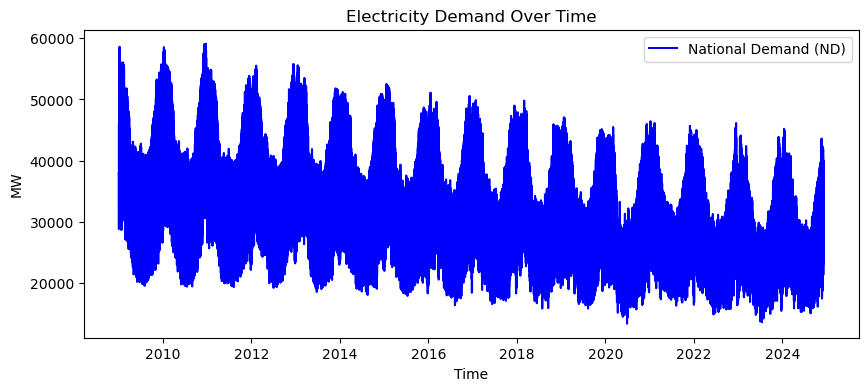

In [74]:
# Visualize demand
plt.figure(figsize=(10,4))
plt.plot(df['nd'], label="National Demand (ND)", color="blue")
plt.xlabel("Time")
plt.ylabel("MW")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.show()

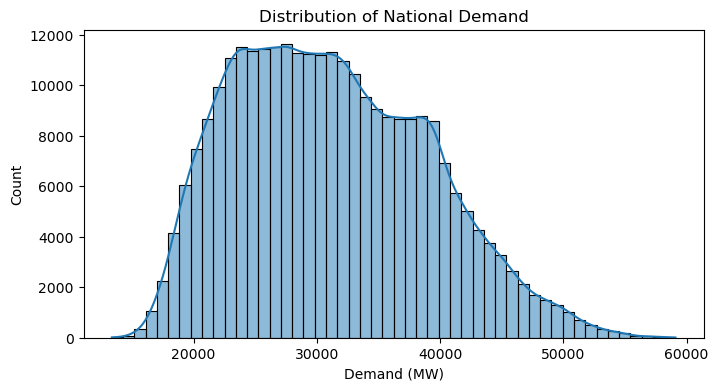

In [191]:
# Demand distribution
plt.figure(figsize=(8,4))
sns.histplot(df['nd'], bins=50, kde=True)
plt.title('Distribution of National Demand')
plt.xlabel('Demand (MW)')
plt.show()



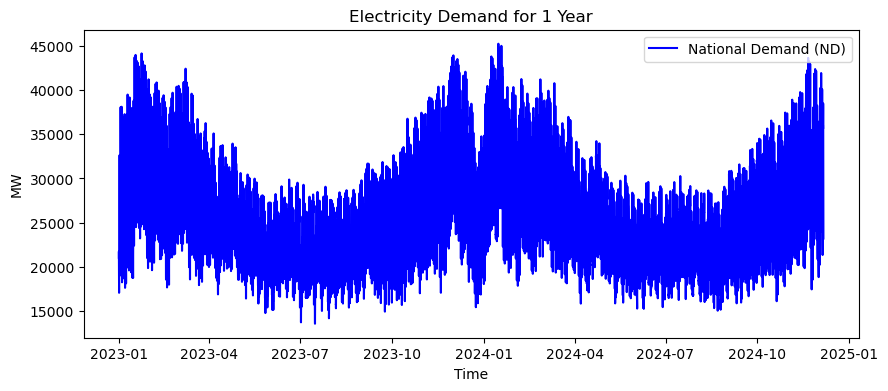

In [76]:
# Plot only 1 year
plt.figure(figsize=(10,4))
plt.plot(df.loc['2023':'2024', 'nd'], label="National Demand (ND)", color="blue")
plt.xlabel("Time")
plt.ylabel("MW")
plt.title("Electricity Demand for 1 Year")
plt.legend()
plt.show()

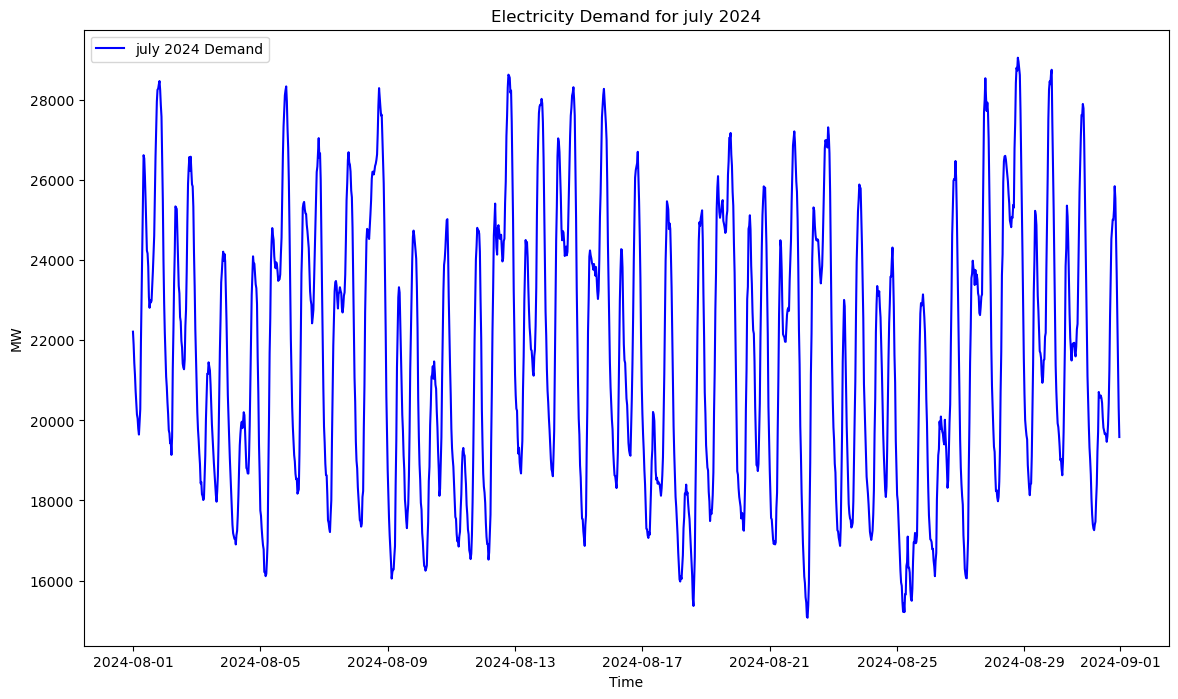

In [114]:
plt.figure(figsize=(14,8))
plt.plot(df.loc['2024-08', 'nd'], label="july 2024 Demand", color="blue")
plt.xlabel("Time")
plt.ylabel("MW")
plt.title("Electricity Demand for july 2024")
plt.legend()
plt.show()

In [116]:
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df.set_index('settlement_date', inplace=True)

In [118]:
df = df[df.index <= '2024-11-30']
# Aggregate demand to monthly total
df_monthly = df['nd'].resample('M').sum()
df_monthly

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23820\1737477922.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['nd'].resample('M').sum()


settlement_date
2009-01-31    63238939
2009-02-28    56073378
2009-03-31    56519297
2009-04-30    49311414
2009-05-31    48437067
                ...   
2024-07-31    33960607
2024-08-31    32288427
2024-09-30    35002964
2024-10-31    39733798
2024-11-30    42742427
Freq: ME, Name: nd, Length: 191, dtype: int64

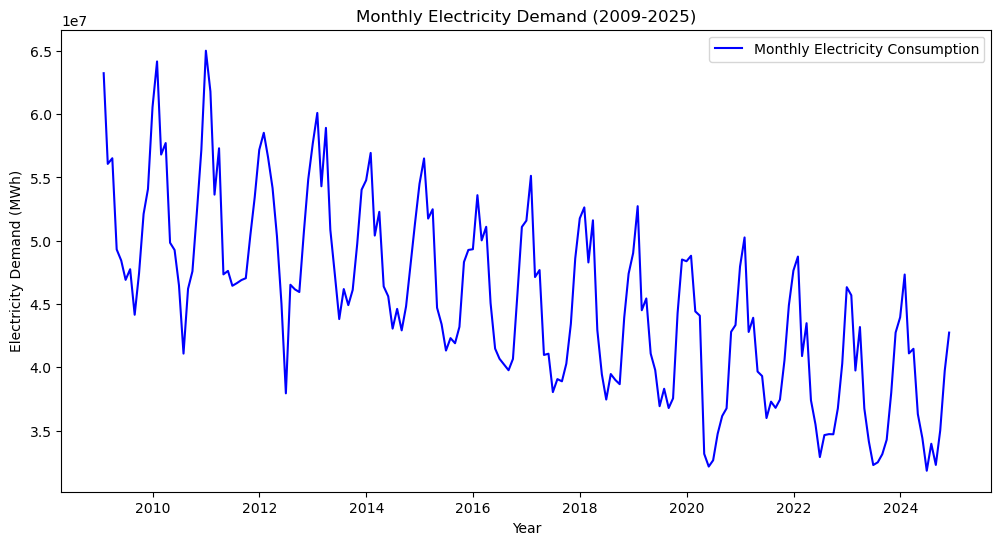

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_monthly, label="Monthly Electricity Consumption", color="blue")
plt.xlabel("Year")
plt.ylabel("Electricity Demand (MWh)")
plt.title("Monthly Electricity Demand (2009-2025)")
plt.legend()
plt.show()

In [122]:
# Find months with maximum and minimum electricity demand
max_month = df_monthly.idxmax()
min_month = df_monthly.idxmin()

max_value = df_monthly.max()
min_value = df_monthly.min()

print(f"📈 Month with highest electricity consumption: {max_month} with {max_value:.2f} MW")
print(f"📉 Month with lowest electricity consumption: {min_month} with {min_value:.2f} MW")

📈 Month with highest electricity consumption: 2010-12-31 00:00:00 with 65015253.00 MW
📉 Month with lowest electricity consumption: 2024-06-30 00:00:00 with 31828428.00 MW


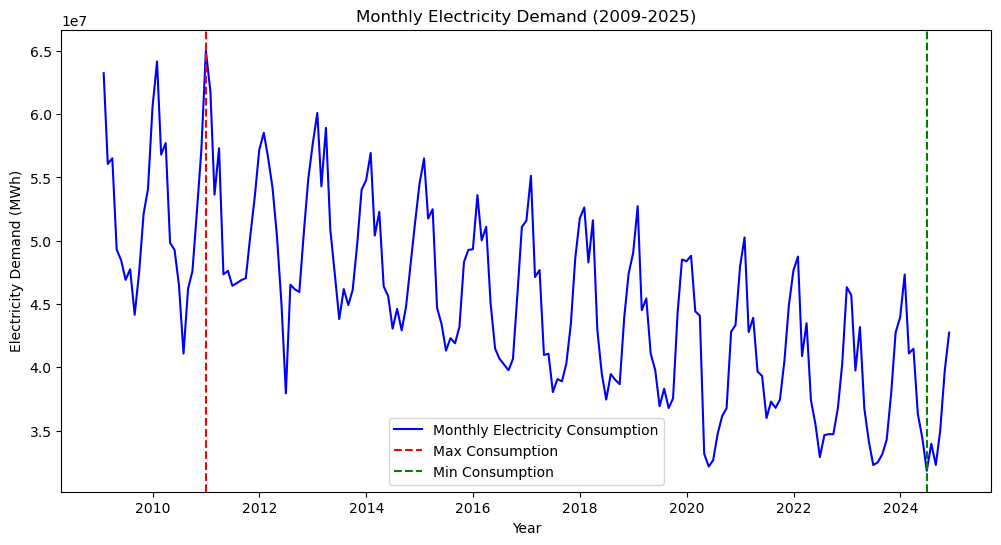

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_monthly, label="Monthly Electricity Consumption", color="blue")
plt.axvline(x=max_month, color='red', linestyle='--', label="Max Consumption")
plt.axvline(x=min_month, color='green', linestyle='--', label="Min Consumption")
plt.xlabel("Year")
plt.ylabel("Electricity Demand (MWh)")
plt.title("Monthly Electricity Demand (2009-2025)")
plt.legend()
plt.show()

PART 1 ARIMA

In [128]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF Test
adf_test = adfuller(df_monthly)

print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")

if adf_test[1] < 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is NOT stationary (fail to reject null hypothesis).")

ADF Statistic: -0.5648
p-value: 0.8787
The data is NOT stationary (fail to reject null hypothesis).


In [130]:
df_diff = df_monthly.diff().dropna()

# Check stationarity again
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_diff)

print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")

if adf_test[1] < 0.05:
    print("The data is now stationary.")
else:
    print("The data is still NOT stationary. Try second-order differencing.")

ADF Statistic: -5.5171
p-value: 0.0000
The data is now stationary.


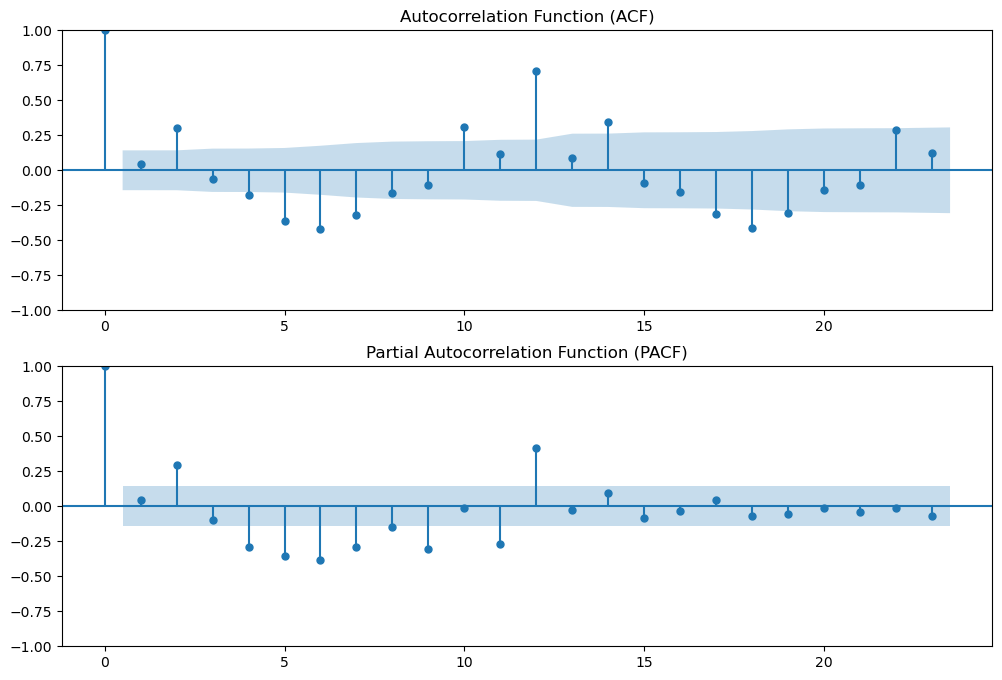

In [132]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF: Determines MA(q) order
plot_acf(df_monthly.diff().dropna(), ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")

# PACF: Determines AR(p) order
plot_pacf(df_monthly.diff().dropna(), ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


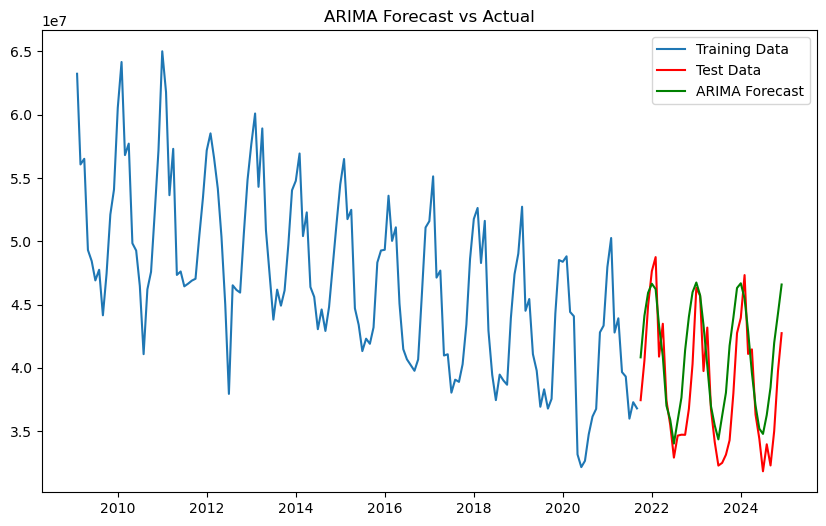

In [136]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df_monthly) * 0.8)  # Use 80% of data for training
train, test = df_monthly[:train_size], df_monthly[train_size:]

p, d, q = 12, 1, 12
model2 = ARIMA(train, order=(p, d, q))
model_fit = model2.fit()

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Convert forecast to pandas series for comparison
forecast_series = pd.Series(forecast, index=test.index)

# Plot the forecast vs actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='red')
plt.plot(forecast_series, label='ARIMA Forecast', color='green')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [138]:
predicted_vs_actual = pd.DataFrame({
    'Actual': test,
    'Predicted': forecast
})

predicted_vs_actual['Actual'] = predicted_vs_actual['Actual'].astype(int)
predicted_vs_actual['Predicted'] = predicted_vs_actual['Predicted'].astype(int)
predicted_vs_actual

,Actual,Predicted
2021-09-30,37446180,40831696
2021-10-31,40560727,44113124
2021-11-30,44898882,45929026
2021-12-31,47642643,46646996
2022-01-31,48750749,46225541
2022-02-28,40887505,43344182
2022-03-31,43485339,40905645
2022-04-30,37399615,37005972
2022-05-31,35482844,35890914
2022-06-30,32909402,34019246


In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Evaluate the model
mae, rmse = evaluate_model(test, forecast_series)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2951619.9673057636
Root Mean Squared Error (RMSE): 3624612.9101834605


In [142]:
future_forecast = model_fit.forecast(steps=24)
future_dates = pd.date_range(start='2024-12-01', periods=24, freq='MS')  # 'MS' stands for Month Start

# Create a DataFrame with the future forecast values
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Demand': future_forecast
})
future_forecast_df['Forecasted Demand'] = future_forecast_df['Forecasted Demand'].astype(int)

future_forecast_df

,Date,Forecasted Demand
2021-09-30,2024-12-01,40831696
2021-10-31,2025-01-01,44113124
2021-11-30,2025-02-01,45929026
2021-12-31,2025-03-01,46646996
2022-01-31,2025-04-01,46225541
2022-02-28,2025-05-01,43344182
2022-03-31,2025-06-01,40905645
2022-04-30,2025-07-01,37005972
2022-05-31,2025-08-01,35890914
2022-06-30,2025-09-01,34019246


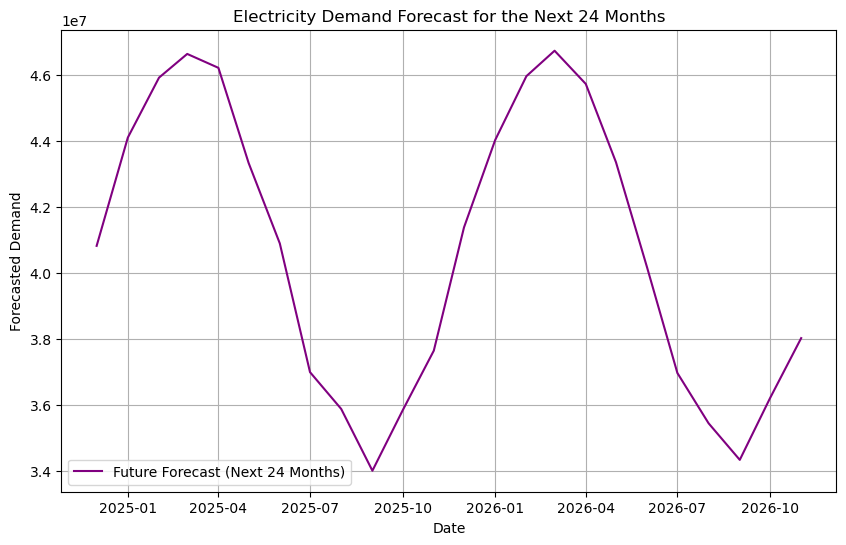

In [144]:
future_forecast_df.set_index('Date', inplace=True)
future_forecast_df['Forecasted Demand'] = future_forecast_df['Forecasted Demand'].astype(int)
plt.figure(figsize=(10, 6))
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted Demand'], label='Future Forecast (Next 24 Months)', color='purple')
plt.title('Electricity Demand Forecast for the Next 24 Months')
plt.xlabel('Date')
plt.ylabel('Forecasted Demand')
plt.legend()
plt.grid(True)
plt.show()

In [146]:
df_monthly

settlement_date
2009-01-31    63238939
2009-02-28    56073378
2009-03-31    56519297
2009-04-30    49311414
2009-05-31    48437067
                ...   
2024-07-31    33960607
2024-08-31    32288427
2024-09-30    35002964
2024-10-31    39733798
2024-11-30    42742427
Freq: ME, Name: nd, Length: 191, dtype: int64

In [148]:
data = df_monthly.copy()
data = data.to_frame()
data['settlement_date'] = data.index

data.reset_index(drop=True, inplace=True)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
scaler = MinMaxScaler()
train['nd'] = scaler.fit_transform(train[['nd']])
test['nd'] = scaler.transform(test[['nd']])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23820\2822739239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['nd'] = scaler.fit_transform(train[['nd']])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23820\2822739239.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['nd'] = scaler.transform(test[['nd']])


In [150]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i: i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)


seq_length = 24 
X_train, y_train = create_sequences(train['nd'].values, seq_length)
X_test, y_test = create_sequences(test['nd'].values, seq_length)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)) # Reshaping the data for RNN/LSTM
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

RNN MODEL 

In [152]:
rnn_model = Sequential([
    SimpleRNN(100, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    SimpleRNN(100, activation='tanh'),
    Dropout(0.3),
    Dense(1)
])
rnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')  # Using MSE for RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, validation_data=(X_test, y_test))

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.2379 - val_loss: 0.0781
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1471 - val_loss: 0.0055
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1208 - val_loss: 0.0484
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0999 - val_loss: 0.0160
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0932 - val_loss: 0.0147
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0640 - val_loss: 0.0070
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0643 - val_loss: 0.0112
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0622 - val_loss: 0.0063
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0501 - val_loss: 0.0087
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0503 - val_loss: 0.0020
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0338 - val_loss: 0.0040
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/ste

LSTM MODEL

In [153]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(100, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    LSTM(100, activation='tanh'),
    Dropout(0.3),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')  # Using MSE for LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 0.1190 - val_loss: 0.0245
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0285 - val_loss: 0.0258
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0385 - val_loss: 0.0227
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0345 - val_loss: 0.0219
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0287 - val_loss: 0.0244
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0306 - val_loss: 0.0208
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0296 - val_loss: 0.0204
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0340 - val_loss: 0.0198
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0274 - val_loss: 0.0204
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0306 - val_loss: 0.0185
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0288 - val_loss: 0.0165
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/ste

MODEL EVALUATION AND PREDICTION


In [155]:
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions) # Inverse transform predictions to original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [160]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    return mae, rmse

In [162]:
rnn_mae, rnn_rmse = evaluate_model(y_test, rnn_predictions)
print(f"RNN MAE: {rnn_mae}, RNN RMSE: {rnn_rmse}")

RNN MAE: 1242399.8, RNN RMSE: 1486466.1210350988


In [164]:
# Evaluate LSTM model
lstm_mae, lstm_rmse = evaluate_model(y_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}, LSTM RMSE: {lstm_rmse}")

LSTM MAE: 1026806.6, LSTM RMSE: 1295297.98490965


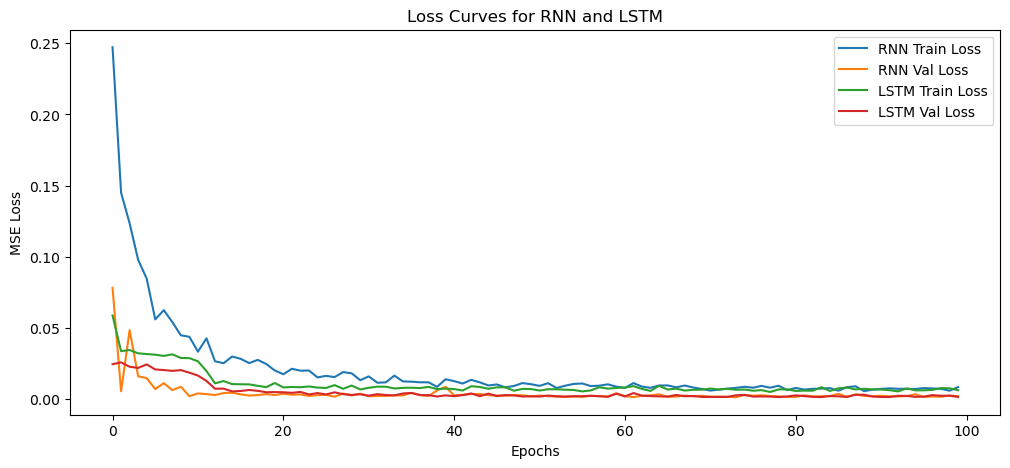

In [166]:
plt.figure(figsize=(12, 5))
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.legend()
plt.title("Loss Curves for RNN and LSTM")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

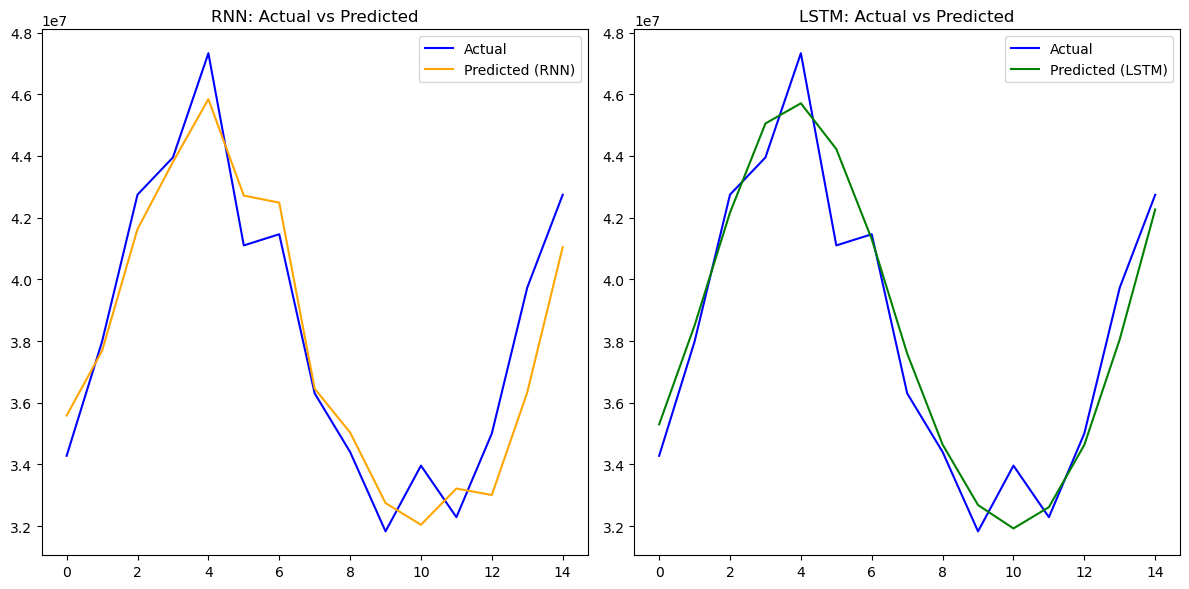

In [168]:
# Plot Predicted vs Actual for RNN and LSTM
plt.figure(figsize=(12, 6))

# Plot for RNN
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual', color='blue')
plt.plot(rnn_predictions, label='Predicted (RNN)', color='orange')
plt.title('RNN: Actual vs Predicted')
plt.legend()

# Plot for LSTM
plt.subplot(1, 2, 2)
plt.plot(y_test, label='Actual', color='blue')
plt.plot(lstm_predictions, label='Predicted (LSTM)', color='green')
plt.title('LSTM: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

FUTURE FORECAST

In [172]:
def forecast_future(model, data, seq_length, n_forecasts):
    predictions = []
    input_seq = data[-seq_length:]  # Start with the last sequence of the training data

    
    for _ in range(n_forecasts):
        input_seq = input_seq.reshape((1, seq_length, 1))  # Reshape for model input
        next_value = model.predict(input_seq)
        predictions.append(next_value[0][0])  # Extract scalar value from prediction

        # Update the input sequence by appending the predicted value and removing the first element
        input_seq = np.append(input_seq[0][1:], next_value[0][0])  # Update sequence

    return np.array(predictions)

In [174]:
# Forecast the next 24 months
rnn_forecast = forecast_future(rnn_model, data['nd'].values, seq_length, 24)
lstm_forecast = forecast_future(lstm_model, data['nd'].values, seq_length, 24)

# Inverse transform the forecasts to original scale
rnn_forecast = scaler.inverse_transform(rnn_forecast.reshape(-1, 1))
lstm_forecast = scaler.inverse_transform(lstm_forecast.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
1/1

In [176]:
future_dates = pd.date_range(start=data['settlement_date'].iloc[-1], periods=25, freq='MS')[1:]

rnn_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Demand (RNN)': rnn_forecast.flatten()
})

lstm_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Demand (LSTM)': lstm_forecast.flatten()
})

In [178]:
rnn_forecast_df

,Date,Forecasted Demand (RNN)
0,2025-01-01,118330048.0
1,2025-02-01,76473472.0
2,2025-03-01,45292780.0
3,2025-04-01,33492816.0
4,2025-05-01,40326204.0
5,2025-06-01,40484320.0
6,2025-07-01,43546488.0
7,2025-08-01,39672996.0
8,2025-09-01,61415684.0
9,2025-10-01,48107728.0


In [180]:
lstm_forecast_df

,Date,Forecasted Demand (LSTM)
0,2025-01-01,114960168.0
1,2025-02-01,119237032.0
2,2025-03-01,112975320.0
3,2025-04-01,107074344.0
4,2025-05-01,101930944.0
5,2025-06-01,95814424.0
6,2025-07-01,87102056.0
7,2025-08-01,78711696.0
8,2025-09-01,72733808.0
9,2025-10-01,69260112.0


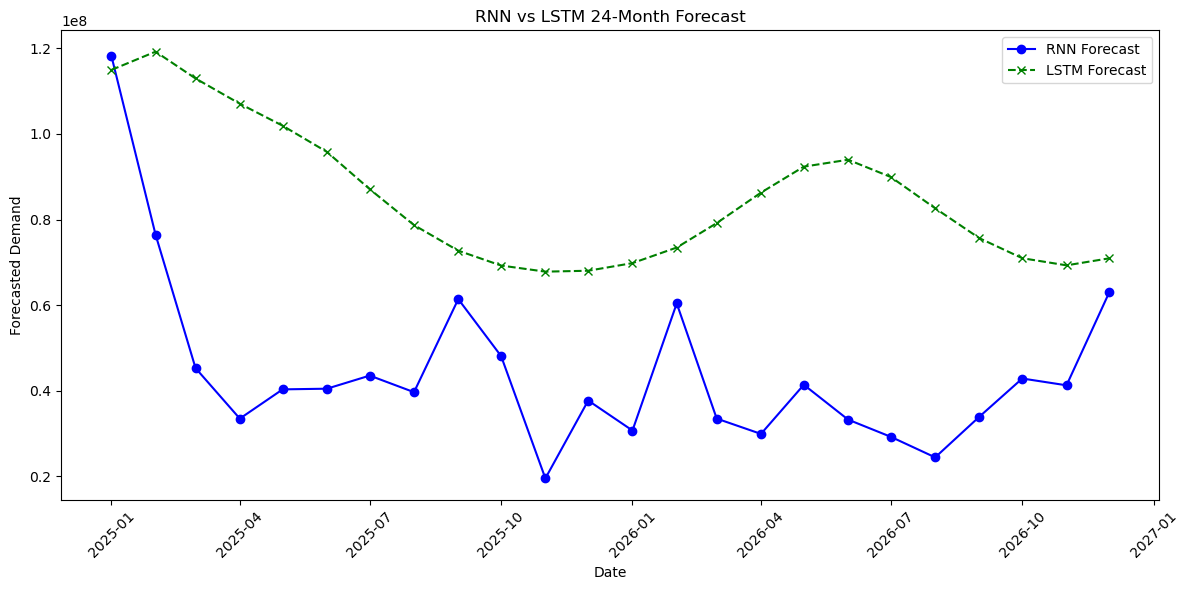

In [182]:
plt.figure(figsize=(12, 6))
plt.plot(rnn_forecast_df['Date'], rnn_forecast_df['Forecasted Demand (RNN)'], label='RNN Forecast', color='blue', linestyle='-', marker='o')
plt.plot(lstm_forecast_df['Date'], lstm_forecast_df['Forecasted Demand (LSTM)'], label='LSTM Forecast', color='green', linestyle='--', marker='x')
plt.title('RNN vs LSTM 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MODEL MERTRIC COMPARISON


In [184]:
data = {
    'Model': ['RNN', 'LSTM', 'ARIMA'],
    'MAE': [1083936.87, 1057001.13, 2967344.15],
    'RMSE': [1409467.74, 1349644.82, 3651363.45]
}

metrics_df = pd.DataFrame(data)

def highlight_best(val):
    color = 'lightgreen' if val == metrics_df[['MAE', 'RMSE']].min().min() else ''
    return f'background-color: {color}'

highlighted_df = metrics_df.style.applymap(highlight_best, subset=['MAE', 'RMSE'])
highlighted_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23820\243878645.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  highlighted_df = metrics_df.style.applymap(highlight_best, subset=['MAE', 'RMSE'])


,Model,MAE,RMSE
0,RNN,1083936.870000,1409467.740000
1,LSTM,1057001.130000,1349644.820000
2,ARIMA,2967344.150000,3651363.450000


In [188]:
!pip install scikeras[tensorflow]
